# Introduction to QuTiP

* 싸이그래머 / QGM - 양자정보 [1]
* 김무성

# Contents
* Installation
* Introduction to QuTiP

http://qutip.org/

# Installation [2]

* Verifying the Installation
* Checking Version Information using the About Function

http://qutip.org/docs/3.1.0/installation.html

In [1]:
!pip install qutip

    100% |################################| 802kB 102kB/s 
  Running setup.py bdist_wheel for qutip
  Stored in directory: /home/jovyan/.cache/pip/wheels/44/60/f9/e279575b87a2a78c57f92a36369946ca6a0d2dbfcc6fe6554b
Successfully built qutip
You are using pip version 7.1.2, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Verifying the Installation

In [1]:
import qutip.testing as qt

In [ ]:
qt.run()

Transform 2-level to eigenbasis and back ... ok
Transform 10-level real-values to eigenbasis and back ... ok
Transform 10-level to eigenbasis and back ... ok
Transform 10-level imag to eigenbasis and back ... ok
Consistency between transformations of kets and density matrices ... ok
Check diagonalization via eigenbasis transformation ... ok
brmesolve: simple qubit ... ok
brmesolve: c_ops alone ... ok
brmesolve: c_ops with a_ops ... ok
brmesolve: harmonic oscillator, zero temperature ... ok
brmesolve: harmonic oscillator, finite temperature ... ok
brmesolve: harmonic oscillator, finite temperature, states ... ok
brmesolve: Jaynes-Cummings model, zero temperature ... ok
correlation: legacy me and es for oscillator in coherent initial state ... ok
correlation: comparing me and es for oscillator in coherent initial state ... ok
correlation: comparing me and mc for driven oscillator in ground state ... 

## Checking Version Information using the About Function

In [6]:
from qutip import *
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
Paul D. Nation & Robert J. Johansson

QuTiP Version:      3.1.0
Numpy Version:      1.9.2
Scipy Version:      0.15.1
Cython Version:     0.22.1
Matplotlib Version: 1.4.3
Fortran mcsolver:   False
scikits.umfpack:    False
Python Version:     3.4.3
Platform Info:      Linux (x86_64)
Installation path:  /opt/conda/lib/python3.4/site-packages/qutip



# Introduction to QuTiP [3]

* Quantum object class: qobj
    - Creating and inspecting quantum objects
    - Using Qobj instances for calculations
* States and operators
    - State vectors
    - Density matrices
    - Operators
        - Qubit (two-level system) operators
        - Harmonic oscillator operators
        - Using Qobj instances we can check some well known commutation relations
* Composite systems
* Unitary dynamics
    - Expectation values
* Dissipative dynamics
* Software versions

http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/qutip-lectures/master/Lecture-0-Introduction-to-QuTiP.ipynb

## Quantum object class: qobj
* Creating and inspecting quantum objects
* Using Qobj instances for calculations

<img src="figures/cap1.png" />

### Creating and inspecting quantum objects

In [3]:
q = Qobj([[1], [0]])
q

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [4]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [5]:
# the shape of the matrix data representation
q.shape

[2, 1]

In [6]:
# the matrix data itself. in sparse matrix format. 
q.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [7]:
# get the dense matrix representation
q.full()

array([[ 1.+0.j],
       [ 0.+0.j]])

In [8]:
# some additional properties
q.isherm, q.type 

(False, 'ket')

### Using Qobj instances for calculations

In [9]:
sy = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator
sy

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [10]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [11]:
# some arithmetic with quantum objects
H = 1.0 * sz + 0.1 * sy
print("Qubit Hamiltonian = \n")
H

Qubit Hamiltonian = 



Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

In [12]:
# The hermitian conjugate
sy.dag()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [13]:
# The trace
H.tr()

0.0

In [14]:
# Eigen energies
H.eigenenergies()

array([-1.00498756,  1.00498756])

In [15]:
help(Qobj)

Help on class Qobj in module qutip.qobj:

class Qobj(builtins.object)
 |  A class for representing quantum objects, such as quantum operators
 |  and states.
 |  
 |  The Qobj class is the QuTiP representation of quantum operators and state
 |  vectors. This class also implements math operations +,-,* between Qobj
 |  instances (and / by a C-number), as well as a collection of common
 |  operator/state operations.  The Qobj constructor optionally takes a
 |  dimension ``list`` and/or shape ``list`` as arguments.
 |  
 |  Parameters
 |  ----------
 |  inpt : array_like
 |      Data for vector/matrix representation of the quantum object.
 |  dims : list
 |      Dimensions of object used for tensor products.
 |  shape : list
 |      Shape of underlying data structure (matrix shape).
 |  fast : bool
 |      Flag for fast qobj creation when running ode solvers.
 |      This parameter is used internally only.
 |  
 |  
 |  Attributes
 |  ----------
 |  data : array_like
 |      Sparse matrix

## States and operators
* State vectors
* Density matrices
* Operators
    - Qubit (two-level system) operators
    - Harmonic oscillator operators
    - Using Qobj instances we can check some well known commutation relations

### State vectors

In [7]:
# Fundamental basis states (Fock states of oscillator modes)

N = 2 # number of states in the Hilbert space
n = 1 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [17]:
fock(4, 2) # another example

Quantum object: dims = [[4], [1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

In [18]:
# a coherent state
coherent(N=10, alpha=1.0)

Quantum object: dims = [[10], [1]], shape = [10, 1], type = ket
Qobj data =
[[ 0.60653066]
 [ 0.60653066]
 [ 0.42888194]
 [ 0.24761511]
 [ 0.12380753]
 [ 0.0553686 ]
 [ 0.02260303]
 [ 0.00854887]
 [ 0.00299672]
 [ 0.00110007]]

### Density matrices

In [19]:
# a fock state as density matrix
fock_dm(5, 2) # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

In [21]:
# coherent state as density matrix
coherent_dm(N=8, alpha=1.0)

Quantum object: dims = [[8], [8]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[  3.67879439e-01   3.67879455e-01   2.60129900e-01   1.50187300e-01
    7.50858773e-02   3.36199110e-02   1.35485515e-02   5.77267786e-03]
 [  3.67879455e-01   3.67879470e-01   2.60129911e-01   1.50187306e-01
    7.50858804e-02   3.36199124e-02   1.35485520e-02   5.77267810e-03]
 [  2.60129900e-01   2.60129911e-01   1.83939513e-01   1.06198399e-01
    5.30937031e-02   2.37728537e-02   9.58026722e-03   4.08189737e-03]
 [  1.50187300e-01   1.50187306e-01   1.06198399e-01   6.13141770e-02
    3.06539153e-02   1.37253761e-02   5.53121524e-03   2.35670388e-03]
 [  7.50858773e-02   7.50858804e-02   5.30937031e-02   3.06539153e-02
    1.53253712e-02   6.86197771e-03   2.76532136e-03   1.17822997e-03]
 [  3.36199110e-02   3.36199124e-02   2.37728537e-02   1.37253761e-02
    6.86197771e-03   3.07246966e-03   1.23818035e-03   5.27555757e-04]
 [  1.35485515e-02   1.35485520e-02   9.58026722e-03   5.5312152

In [22]:
# thermal state
n = 1 # average number of thermal photons
thermal_dm(8, n)

Quantum object: dims = [[8], [8]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 0.50196078  0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.25098039  0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.1254902   0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.0627451   0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.03137255  0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.01568627
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.00784314  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.00392157]]

### Operators

#### Qubit (two-level system) operators

In [23]:
# Pauli sigma x
sigmax()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [24]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [25]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

#### Harmonic oscillator operators

In [26]:
#  annihilation operator
destroy(N=8) # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[ 0.          1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.41421356  0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.73205081  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          2.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          2.23606798
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   2.44948974  0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   2.64575131]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]]

In [27]:
# creation operator
create(N=8) # equivalent to destroy(5).dag()

Quantum object: dims = [[8], [8]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.41421356  0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.73205081  0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          2.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          2.23606798  0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          2.44948974
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   2.64575131  0.        ]]

In [28]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)
x = a + a.dag()
x

Quantum object: dims = [[8], [8]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 0.          1.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.          0.          1.41421356  0.          0.          0.          0.
   0.        ]
 [ 0.          1.41421356  0.          1.73205081  0.          0.          0.
   0.        ]
 [ 0.          0.          1.73205081  0.          2.          0.          0.
   0.        ]
 [ 0.          0.          0.          2.          0.          2.23606798
   0.          0.        ]
 [ 0.          0.          0.          0.          2.23606798  0.
   2.44948974  0.        ]
 [ 0.          0.          0.          0.          0.          2.44948974
   0.          2.64575131]
 [ 0.          0.          0.          0.          0.          0.
   2.64575131  0.        ]]

#### Using Qobj instances we can check some well known commutation relations

In [29]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

$[a, a^1] = 1$

In [30]:
a = destroy(5)
commutator(a, a.dag())

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]

$[x,p] = i$

In [20]:
from math import *

In [33]:
x =       (a + a.dag())/sqrt(2)
p = -1j * (a - a.dag())/sqrt(2)
commutator(x, p)

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = False
Qobj data =
[[ 0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-4.j]]

Let's try some Pauli spin inequalities

$[\sigma_x, \sigma_y] = 2i \sigma_z$

In [34]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  0.]]

$-i \sigma_x \sigma_y \sigma_z = \mathbf{1}$

In [35]:
-1j * sigmax() * sigmay() * sigmaz()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0.  1.]]

$\sigma_x^2 = \sigma_y^2 = \sigma_z^2 = \mathbf{1}$

In [36]:
sigmax()**2 == sigmay()**2 == sigmaz()**2 == qeye(2)

True

## Composite systems

In most cases we are interested in coupled quantum systems, for example coupled qubits, a qubit coupled to a cavity (oscillator mode), etc.

To define states and operators for such systems in QuTiP, we use the `tensor` function to create `Qobj` instances for the composite system.

For example, consider a system composed of two qubits. If we want to create a Pauli $\sigma_z$ operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator $\sigma_z \otimes \mathbf{1}$), we would do:

In [37]:
sz1 = tensor(sigmaz(), qeye(2))
sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

In [38]:
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit

In [39]:
sz1 * psi1 == psi1 # this should not be true, because sz1 should flip the sign of the excited state of psi1

False

In [40]:
sz1 * psi2 == psi2 # this should be true, because sz1 should leave psi2 unaffected

True

In [41]:
sz2 = tensor(qeye(2), sigmaz())
sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Using the same method we can create coupling terms of the form $\sigma_x \otimes \sigma_x$:

In [42]:
tensor(sigmax(), sigmax())

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]

Now we are ready to create a `Qobj` representation of a coupled two-qubit Hamiltonian: $H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)}$

In [43]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

To create composite systems of different types, all we need to do is to change the operators that we pass to the `tensor` function (which can take an arbitrary number of operator for composite systems with many components).

For example, the Jaynes-Cumming Hamiltonian for a qubit-cavity system:

$H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-)$

In [45]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz())   # sigma-z operator
sm = tensor(qeye(5), destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[5, 2], [5, 2]], shape = [10, 10], type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         

Note that 

$a \sigma_+ = (a \otimes \mathbf{1}) (\mathbf{1} \otimes \sigma_+)$

so the following two are identical:

In [46]:
a = tensor(destroy(3), qeye(2))
sp = tensor(qeye(3), create(2))

a * sp

Quantum object: dims = [[3, 2], [3, 2]], shape = [6, 6], type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.41421356  0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]

In [47]:
tensor(destroy(3), create(2))

Quantum object: dims = [[3, 2], [3, 2]], shape = [6, 6], type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.41421356  0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]

## Unitary dynamics
* Expectation values

Unitary evolution of a quantum system in QuTiP can be calculated with the `mesolve` function. 

`mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form).

The evolution solvers in QuTiP returns a class of type `Odedata`, which contains the solution to the problem posed to the evolution solver. 

For example, considor a qubit with Hamiltonian $H = \sigma_x$ and initial state $\left|1\right>$ (in the sigma-z basis): Its evolution can be calculated as follows:

In [8]:
import numpy as np

In [9]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

In [10]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [11]:
len(result.states)

100

In [12]:
result.states[-1] # the finial state

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.0000000+0.54401206j]]

### Expectation values

In [13]:
expect(sigmaz(), result.states[-1])

0.40810176186454994

In [14]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

In [15]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

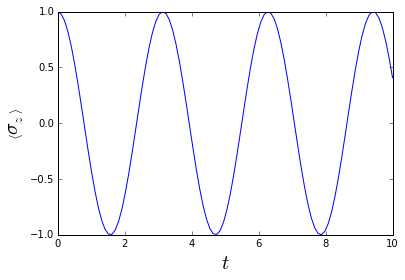

In [16]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

If we are only interested in expectation values, we could pass a list of operators to the `mesolve` function that we want expectation values for, and have the solver compute then and store the results in the `Odedata` class instance that it returns.

For example, to request that the solver calculates the expectation values for the operators $\sigma_x, \sigma_y, \sigma_z$:

In [17]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

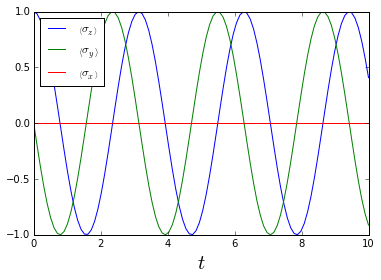

In [18]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);

## Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the `mesolve` solver.

A collapse operator is an operator that describes how the system is interacting with its environment. 

For example, consider a quantum harmonic oscillator with Hamiltonian 

$H = \hbar\omega a^\dagger a$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is 

$\sqrt{\kappa} a$

since $a$ is the photon annihilation operator of the oscillator. 

To program this problem in QuTiP:

In [21]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [sqrt(kappa) * a]

In [22]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 

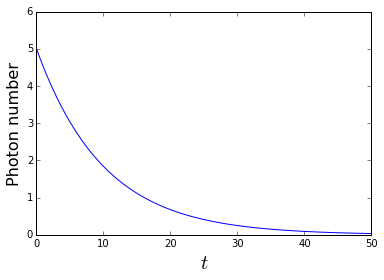

In [23]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

## Software versions

In [24]:
from qutip.ipynbtools import version_table

version_table()

/opt/conda/lib/python3.4/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


ImportError: No module named 'parallel'

In [25]:
from qutip import *
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
Paul D. Nation & Robert J. Johansson

QuTiP Version:      3.1.0
Numpy Version:      1.9.2
Scipy Version:      0.15.1
Cython Version:     0.22.1
Matplotlib Version: 1.4.3
Fortran mcsolver:   False
scikits.umfpack:    False
Python Version:     3.4.3
Platform Info:      Linux (x86_64)
Installation path:  /opt/conda/lib/python3.4/site-packages/qutip



# 참고자료
* [1] http://qutip.org/
* [2] http://qutip.org/docs/3.1.0/installation.html
* [3] http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/qutip-lectures/master/Lecture-0-Introduction-to-QuTiP.ipynb